## 一维傅里叶变换

In [4]:
%matplotlib inline 
from scipy.fftpack import fft,ifft
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)

In [8]:
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [10]:
yinv = ifft(y)

In [12]:
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

In [14]:
np.sum(x)

4.5

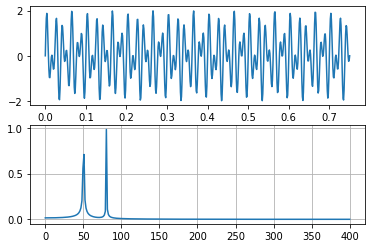

In [25]:
N = 600
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
omg = 2.0*np.pi*x
y1 = np.sin(50.0 * omg)
y2 = np.sin(80.0 * omg)
y = y1 + y2
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.subplot(2,1,1)
plt.plot(x,y)
plt.subplot(2,1,2)
plt.plot(xf,2.0/N *np.abs(yf[0:N//2]))
plt.grid()

plt.show()

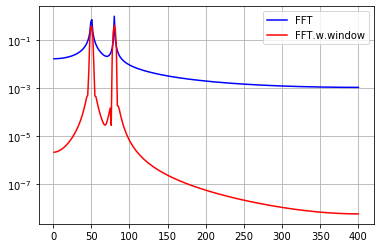

In [28]:
N = 600
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
omg = 2.0*np.pi*x
y = np.sin(50.0*omg) + np.sin(80.0*omg)
yf = fft(y)
w = np.blackman(N)
ywf = fft(y*w)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.semilogy(xf[1:N//2], 2.0/N*np.abs(yf[1:N//2]),'-b')
plt.semilogy(xf[1:N//2], 2.0/N*np.abs(ywf[1:N//2]),'-r')
plt.legend(['FFT', 'FFT.w.window'])
plt.grid()
plt.show()

In [32]:
# note // 表示取整,向下取整
10.0 / 3

3.3333333333333335

In [31]:
10.0 // 3

3.0

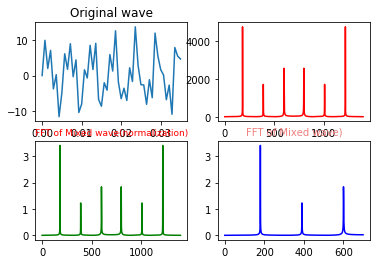

In [35]:
import seaborn
x = np.linspace(0,1,1400)
omg = 2*np.pi*x
y1 = 7   * np.sin(180 * omg)
y2 = 2.8 * np.sin(390 * omg)
y3 = 5.1 * np.sin(600 * omg)
y  = y1 + y2 + y3
yy = fft(y)
yreal = yy.real
yimag = yy.imag

yf  = abs(fft(y))
yf1 = yf/len(x)
yf2 = yf1[range(int(len(x)/2))]

xf  = np.arange(len(y))
xf1 = xf
xf2 = range(int(len(x)/2))

plt.subplot(221)
plt.plot(x[0:50], y[0:50])
plt.title('Original wave')

plt.subplot(222)
plt.plot(xf,yf,'r')

plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')

plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')

plt.show()

# 原文链接：https://blog.csdn.net/ouening/article/details/71079535

/home/bxdm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
/home/bxdm/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


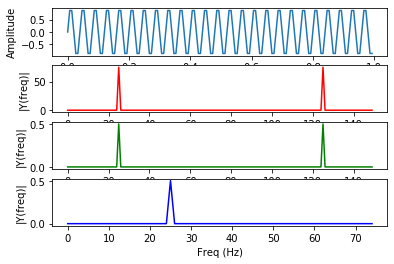

In [36]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import seaborn



Fs = 150.0;                 # sampling rate采样率
Ts = 1.0/Fs;                # sampling interval 采样区间
t = np.arange(0,1,Ts)       # time vector,这里Ts也是步长

ff = 25;                    # frequency of the signal
y = np.sin(2*np.pi*ff*t)

n = len(y)                  # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T                   # two sides frequency range
frq1 = frq[range(int(n/2))] # one side frequency range

YY = np.fft.fft(y)          # 未归一化
Y = np.fft.fft(y)/n         # fft computing and normalization 归一化
Y1 = Y[range(int(n/2))]

fig, ax = plt.subplots(4, 1)

ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].plot(frq,abs(YY),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

ax[2].plot(frq,abs(Y),'G')  # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')

ax[3].plot(frq1,abs(Y1),'B') # plotting the spectrum
ax[3].set_xlabel('Freq (Hz)')
ax[3].set_ylabel('|Y(freq)|')

plt.show()
